<a href="https://colab.research.google.com/github/SirimarcoUERJ/MachineLearning/blob/main/KNN_census.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
import pickle as pkl
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

In [8]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
arq = "/content/drive/MyDrive/Colab Notebooks/Machine Learn/data/census.pkl"
with open(arq, "rb") as f:
  x_treino, y_treino, x_teste, y_teste = pkl.load(f)

In [24]:
x_treino.shape, y_treino.shape, x_teste.shape, y_teste.shape

((27676, 108), (27676,), (4885, 108), (4885,))

In [64]:
knn_census = KNeighborsClassifier(n_neighbors=100, p=2, metric="minkowski")
knn_census.fit(x_treino, y_treino)

KNeighborsClassifier(n_neighbors=100)

In [65]:
previsoes = knn_census.predict(x_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [66]:
y_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [67]:
accuracy_score(y_teste, previsoes)

0.8290685772773797

0.8290685772773797

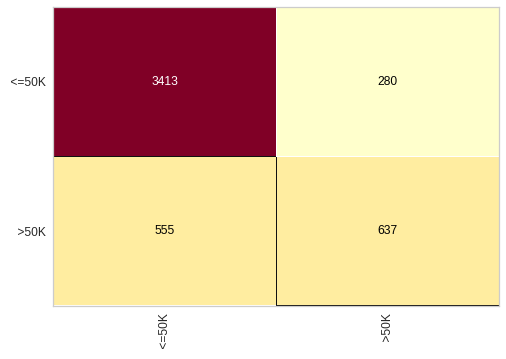

In [68]:
cm = ConfusionMatrix(knn_census)
cm.fit(x_treino, y_treino)
cm.score(x_teste, y_teste)

In [69]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.86      0.92      0.89      3693
        >50K       0.69      0.53      0.60      1192

    accuracy                           0.83      4885
   macro avg       0.78      0.73      0.75      4885
weighted avg       0.82      0.83      0.82      4885

